# Climate Change: Earth Surface Temperature

You found data from https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/code and you can get more information from the website. I want know how the Earth Surface Temperature  change in 1791 up to 2013. 

## About Data

* Date: starts in 1750 for average land temperature
* LandAverageTemperature: global average land temperature in celsius
* LandAverageTemperatureUncertainty: the 95% confidence interval around the average
* City
* Country

# Objectives

By the end of this case study, you will be able to answer the following questions:
* How the average temperature change in 1791 up to 2013
* Hotest cities in the world 
* Hotest country in the world

# Data Analysis
Data is one of the key features of any organization because it helps business leaders make informed decisions about statistics and trends. Due to this growing data, data science has entered the picture which is a multidisciplinary field. It uses scientific approaches, procedure, algorithms, and framework to extract the knowledge and insight from a huge amount of data.

In [51]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import holoviews as hv
import datetime as dt
import geopandas as gpd
import hvplot.pandas
import plotly.graph_objects as go
import pycountry_convert as pc
import plotly_express as px
import warnings
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
#pn.extension('tabulator', sizing_mode="stretch_width")

# To define function

In [57]:
def environment():
    try:
        get_ipython()
        return "notebook"
    except:
        return "server"
environment()

'notebook'

# Load data into pandas frame

In [36]:
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [37]:
df['dt'] =  pd.to_datetime(df['dt'], format='%Y-%m-%d')

In [38]:
#df[df['Country'] == "Congo (Democratic Republic Of The)"] 

In [39]:
df['year']= df['dt'].dt.year
df['month']= df['dt'].dt.month
df['day']= df['dt'].dt.day

In [40]:
df['Country'].replace("Côte D'Ivoire","Côte d'Ivoire", inplace=True)
df['Country'].replace('Congo (Democratic Republic Of The)','Democratic Republic of the Congo', inplace=True)
df['Country'].replace("Burma","Myanmar", inplace=True)
#df['Country'].replace('Congo (the Democratic Republic of the)','Congo (the Democratic Republic of the)', inplace=True)

In [41]:
# Now, we add 2 new columns to for Country code and Continent that the country belongs 
df['Country_code']= df['Country'].apply(lambda x: pc.country_name_to_country_alpha2(x, cn_name_format="default"))
mask= df['Country_code']=='TL' 
df=df[~mask]
df['Country_continent']= df['Country_code'].apply(lambda x: pc.country_alpha2_to_continent_code(x))
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day,Country_code,Country_continent
0,1849-01-01,26.704,1.435,Abidjan,Côte d'Ivoire,5.63N,3.23W,1849,1,1,CI,AF
1,1849-02-01,27.434,1.362,Abidjan,Côte d'Ivoire,5.63N,3.23W,1849,2,1,CI,AF
2,1849-03-01,28.101,1.612,Abidjan,Côte d'Ivoire,5.63N,3.23W,1849,3,1,CI,AF


# Cleaning data

In [42]:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
year                                 0
month                                0
day                                  0
Country_code                         0
Country_continent                    0
dtype: int64

In [43]:
#Fill NaNs with 0 and then drop all countries with Latitude = 0.
df.fillna(0, inplace = True)
df.drop(df.index[df['Country_code'] == 0], inplace = True)

In [44]:
#To describe our data
df.describe()

,AverageTemperature,AverageTemperatureUncertainty,year,month,day
count,239177.000000,239177.000000,239177.000000,239177.000000,239177.0
mean,17.292185,0.924754,1910.394800,6.496156,1.0
std,10.501991,0.978157,63.230923,3.450576,0.0
min,-26.772000,0.000000,1743.000000,1.000000,1.0
25%,10.853000,0.315000,1864.000000,3.000000,1.0
50%,19.841000,0.556000,1914.000000,6.000000,1.0
75%,25.719000,1.271000,1963.000000,9.000000,1.0
max,38.283000,14.037000,2013.000000,12.000000,1.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239177 entries, 0 to 239176
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             239177 non-null  float64       
 2   AverageTemperatureUncertainty  239177 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
 7   year                           239177 non-null  int64         
 8   month                          239177 non-null  int64         
 9   day                            239177 non-null  int64         
 10  Country_code                   239177 non-null  object        
 11  

In [46]:
# dp3= df.copy()
# # Create 1 collumn for country code of alpha3
# dp3['alpha3']= dp3['Country'].apply(lambda x: pc.country_name_to_country_alpha3(x))
# dp3.head(3)

# Top Hottest City in the world

In [63]:
# By grouping total vaccinations given by country and sort descending to identify the top 10 countries. 
most_temp_by_city = df.groupby('City').max().sort_values('AverageTemperature', ascending=False)
most_temp_by_city = most_temp_by_country.iloc[:10]
most_temp_by_city

,City,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,year,month,day,Country_code,Country_continent
0,Baghdad,2013-09-01,38.283,4.752,Iraq,32.95N,45.00E,2013,12,1,IQ,AS
1,Riyadh,2013-09-01,37.859,4.399,Saudi Arabia,24.92N,46.11E,2013,12,1,SA,AS
2,Jaipur,2013-09-01,36.477,5.551,India,26.52N,75.22E,2013,12,1,IN,AS
3,Lahore,2013-09-01,36.346,4.973,Pakistan,31.35N,73.51E,2013,12,1,PK,AS
4,Faisalabad,2013-09-01,36.346,4.973,Pakistan,31.35N,73.51E,2013,12,1,PK,AS
5,New Delhi,2013-09-01,36.339,5.548,India,28.13N,77.27E,2013,12,1,IN,AS
6,Delhi,2013-09-01,36.339,5.548,India,28.13N,77.27E,2013,12,1,IN,AS
7,Nagpur,2013-09-01,36.052,6.478,India,21.70N,78.75E,2013,12,1,IN,AS
8,Umm Durman,2013-09-01,35.700,4.663,Sudan,15.27N,32.50E,2013,12,1,SD,AF
9,Lakhnau,2013-09-01,35.618,6.085,India,26.52N,80.60E,2013,12,1,IN,AS


In [64]:
most_temp_by_city= most_temp_by_country.reset_index()
most_temp_by_city

,index,City,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,year,month,day,Country_code,Country_continent
0,0,Baghdad,2013-09-01,38.283,4.752,Iraq,32.95N,45.00E,2013,12,1,IQ,AS
1,1,Riyadh,2013-09-01,37.859,4.399,Saudi Arabia,24.92N,46.11E,2013,12,1,SA,AS
2,2,Jaipur,2013-09-01,36.477,5.551,India,26.52N,75.22E,2013,12,1,IN,AS
3,3,Lahore,2013-09-01,36.346,4.973,Pakistan,31.35N,73.51E,2013,12,1,PK,AS
4,4,Faisalabad,2013-09-01,36.346,4.973,Pakistan,31.35N,73.51E,2013,12,1,PK,AS
5,5,New Delhi,2013-09-01,36.339,5.548,India,28.13N,77.27E,2013,12,1,IN,AS
6,6,Delhi,2013-09-01,36.339,5.548,India,28.13N,77.27E,2013,12,1,IN,AS
7,7,Nagpur,2013-09-01,36.052,6.478,India,21.70N,78.75E,2013,12,1,IN,AS
8,8,Umm Durman,2013-09-01,35.700,4.663,Sudan,15.27N,32.50E,2013,12,1,SD,AF
9,9,Lakhnau,2013-09-01,35.618,6.085,India,26.52N,80.60E,2013,12,1,IN,AS


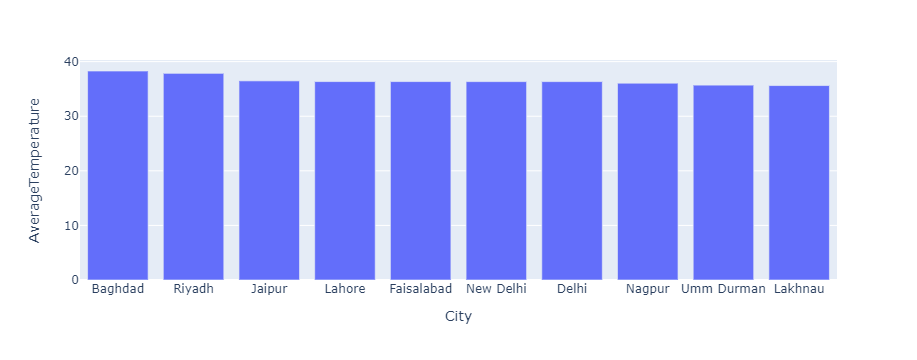

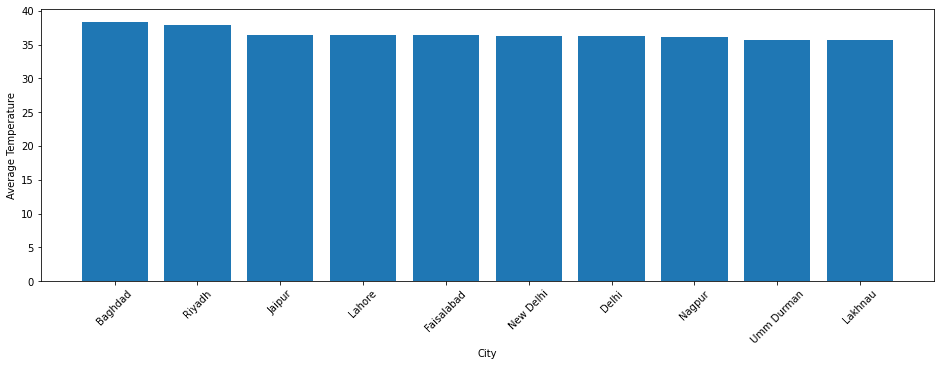

In [65]:
fig =px.bar(most_temp_by_city, x="City", y="AverageTemperature")
fig.show()

plt.figure(figsize=(16, 5))
plt.bar(most_temp_by_city.City, most_temp_by_city.AverageTemperature)

plt.xticks(rotation = 45)
plt.ylabel('Average Temperature')
plt.xlabel('City')
plt.show()

In [59]:
# By grouping total vaccinations given by country and sort descending to identify the top 10 countries. 
hotest_country = df.groupby('Country').max().sort_values('AverageTemperature', ascending=False)
hotest_country = hotest_country.iloc[:10]
hotest_country

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude,year,month,day,Country_code,Country_continent
Country,,,,,,,,,,,
Iraq,2013-09-01,38.283,4.752,Baghdad,32.95N,45.00E,2013,12,1,IQ,AS
Saudi Arabia,2013-09-01,37.859,4.399,Riyadh,24.92N,46.11E,2013,12,1,SA,AS
India,2013-09-01,36.477,7.781,Surat,28.13N,88.25E,2013,12,1,IN,AS
Pakistan,2013-09-01,36.346,4.973,Lahore,31.35N,73.51E,2013,12,1,PK,AS
Sudan,2013-09-01,35.700,4.663,Umm Durman,15.27N,32.50E,2013,12,1,SD,AF
Nigeria,2013-09-01,33.068,3.775,Lagos,7.23N,8.22E,2013,12,1,NG,AF
Syria,2013-09-01,32.629,5.450,Aleppo,36.17N,37.79E,2013,12,1,SY,AS
Myanmar,2013-09-01,31.960,5.806,Rangoon,16.87N,95.44E,2013,12,1,MM,AS
China,2013-09-01,31.233,6.870,Xian,45.81N,125.77E,2013,12,1,CN,AS


In [60]:
hotest_country= hotest_country.reset_index()
hotest_country

,Country,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude,year,month,day,Country_code,Country_continent
0,Iraq,2013-09-01,38.283,4.752,Baghdad,32.95N,45.00E,2013,12,1,IQ,AS
1,Saudi Arabia,2013-09-01,37.859,4.399,Riyadh,24.92N,46.11E,2013,12,1,SA,AS
2,India,2013-09-01,36.477,7.781,Surat,28.13N,88.25E,2013,12,1,IN,AS
3,Pakistan,2013-09-01,36.346,4.973,Lahore,31.35N,73.51E,2013,12,1,PK,AS
4,Sudan,2013-09-01,35.700,4.663,Umm Durman,15.27N,32.50E,2013,12,1,SD,AF
5,Nigeria,2013-09-01,33.068,3.775,Lagos,7.23N,8.22E,2013,12,1,NG,AF
6,Syria,2013-09-01,32.629,5.450,Aleppo,36.17N,37.79E,2013,12,1,SY,AS
7,Myanmar,2013-09-01,31.960,5.806,Rangoon,16.87N,95.44E,2013,12,1,MM,AS
8,China,2013-09-01,31.233,6.870,Xian,45.81N,125.77E,2013,12,1,CN,AS
9,Thailand,2013-09-01,31.115,5.327,Bangkok,13.66N,99.91E,2013,12,1,TH,AS


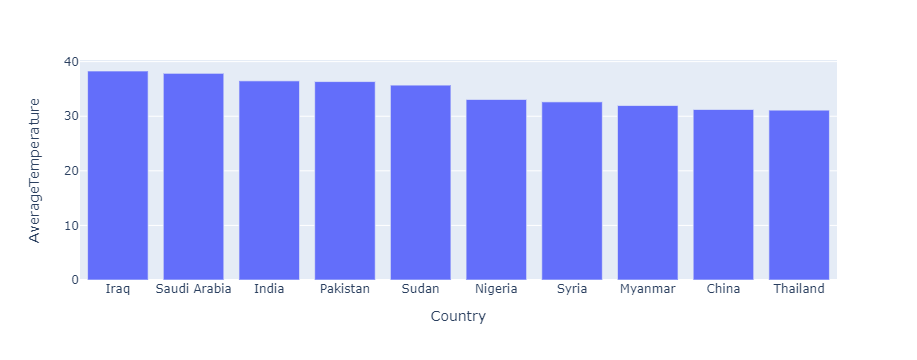

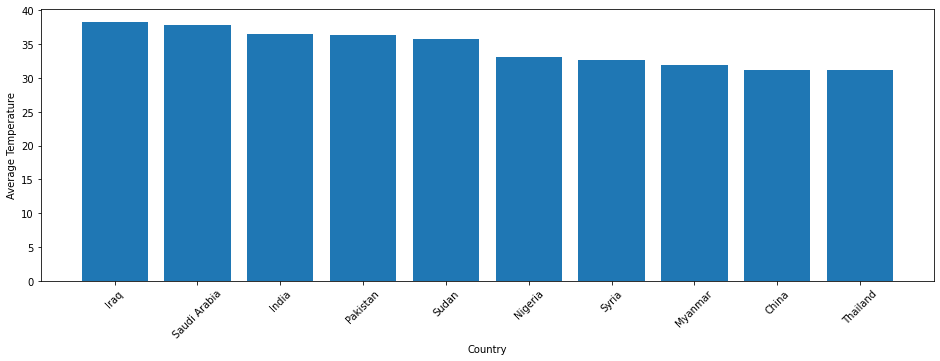

In [61]:
fig =px.bar(hotest_country, x="Country", y="AverageTemperature")
fig.show()

plt.figure(figsize=(16, 5))
plt.bar(hotest_country.Country, hotest_country.AverageTemperature)

plt.xticks(rotation = 45)
plt.ylabel('Average Temperature')
plt.xlabel('Country')
plt.show()

In [18]:
df['Country_continent'].value_counts()

AS    129255
AF     39545
EU     25912
SA     20964
NA     19355
OC      4146
Name: Country_continent, dtype: int64

# Data Pipeline

In [19]:
idf = df.interactive()

In [20]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=1791, end=2013, step=5, value=1900)
year_slider

IntSlider(end=2013, name='Year slider', start=1791, step=5, value=1900)

In [21]:
# Radio buttons for temperature measures
yaxis_temp = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['AverageTemperature', 'AverageTemperatureUncertainty'],
    button_type='success'
)

In [22]:
Hotest_country = df['Country']

temp_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.Country.isin(Hotest_country))
    ]
    .groupby(['Country','City', 'year'])[yaxis_temp].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Country')  
    .reset_index(drop=True)
)

In [23]:
#temp_pipeline

In [24]:
temp_plot = temp_pipeline.hvplot(x = 'year', by='Country', y=yaxis_temp,line_width=2, title="Average temperature by country")
temp_plot

In [25]:
temp_table = temp_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
temp_table

In [26]:
continents = ['AS ', 'AF', 'EU', 'SA', 'NA', 'OC']

cont_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.Country_continent.isin(continents))
    ]
    .groupby(['year','Country_continent'])[yaxis_temp].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [27]:
#cont_pipeline

In [28]:
cont_pipeline_bar_plot = cont_pipeline.hvplot(kind='bar', 
                                                     x='Country_continent', 
                                                     y=yaxis_temp, 
                                                     title='Temperature by continents')
cont_pipeline_bar_plot

# Creating attractive Dashboard

In [62]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Earth Surface Temperature dashboard', 
    sidebar=[pn.pane.Markdown("# Earth Surface Temperature and Climate Change"), 
             pn.pane.Markdown("#### High Temperature are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce temperature. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('Earth_Surface_Temperature.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_temp, 
                           cont_pipeline_bar_plot.panel(width=300), margin=(0,25)), 
                 temp_table.panel(width=600)), 
          pn.Row(pn.Column(temp_plot.panel(width=1000), margin=(0,25)), 
                 )],
    accent_base_color="#88d8b0",
    header_background="#FF4500",
)
template.show()
#template.servable();

Launching server at http://localhost:62508
